# Fundamental Image Processing Operations

This notebook serves as a cookbook for several fundamental image processing operations in OpenCV. Each section covers a distinct topic, demonstrating the core functions and their common use cases.
> https://docs.opencv.org/4.x/d2/d96/tutorial_py_table_of_contents_imgproc.html

### Table of Contents

- [Step 1: Setup](#Step-1:-Setup)
- [1. Image Arithmetic](#1.-Image-Arithmetic)
- [2. Color Space Conversions](#2.-Color-Space-Conversions)
- [3. Image Smoothing (Blurring)](#3.-Image-Smoothing-(Blurring))
- [4. Bitwise Operations](#4.-Bitwise-Operations)
- [Next Steps](#Next-Steps)

### Step 1: Setup

We import all necessary libraries and define the path to our shared assets folder.

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

assets_path = os.path.join('..', '_assets')

## 1. Image Arithmetic

This section covers adding two images together using `cv2.add()` for simple saturated addition and `cv2.addWeighted()` for blending.

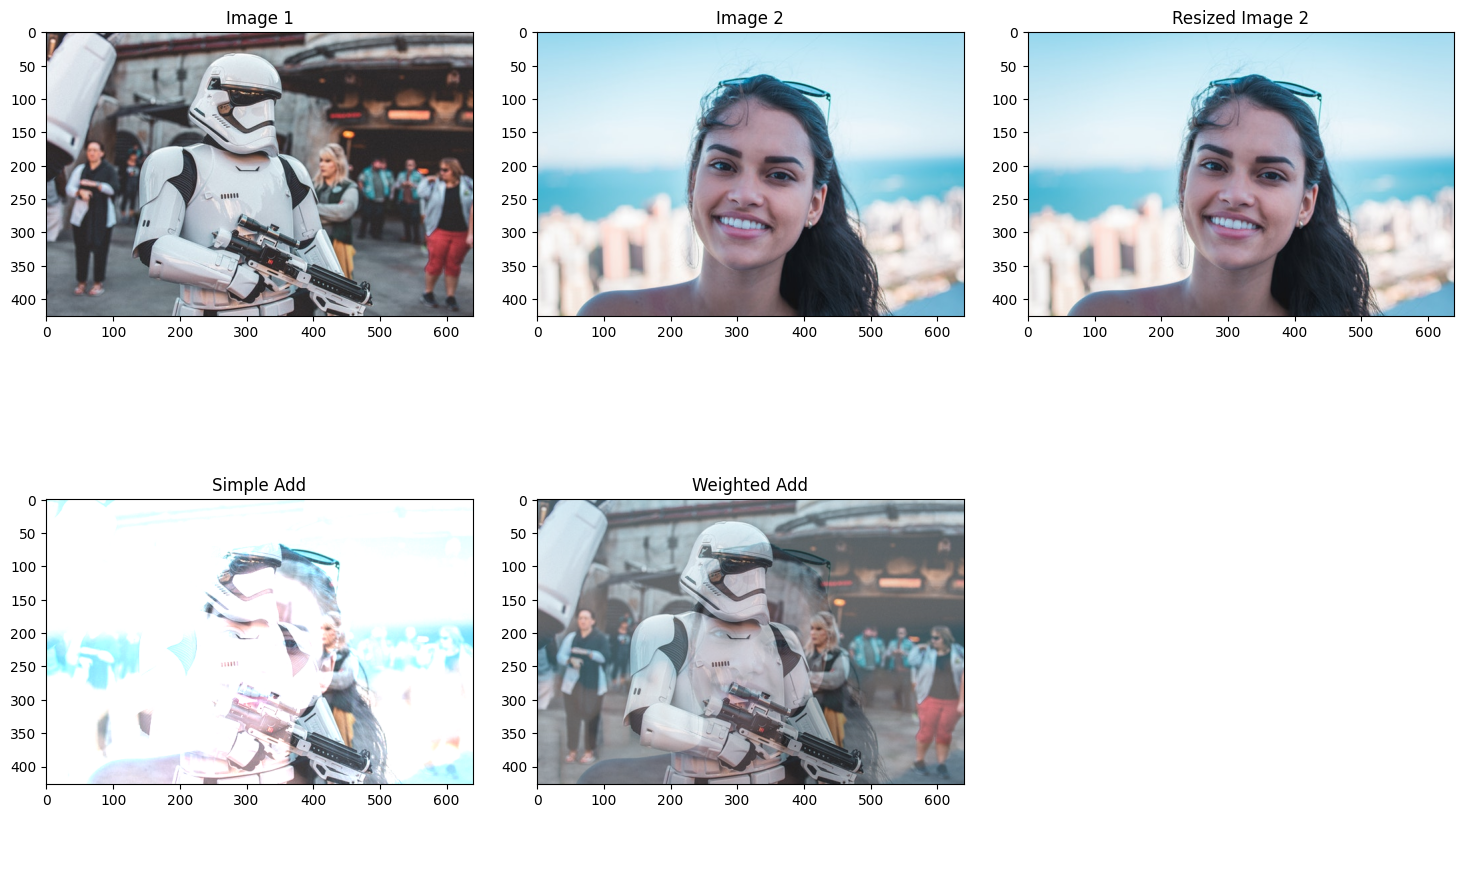

In [2]:
img1 = cv2.imread(os.path.join(assets_path, 'klon.jpg'))
img2 = cv2.imread(os.path.join(assets_path, 'smile.jpg'))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# To add images, they must be the same size. We resize img2 to match img1.
h, w, _ = img1.shape
img2_resized = cv2.resize(img2, (w, h))

simple_add = cv2.add(img1, img2_resized)
weighted_add = cv2.addWeighted(img1, 0.7, img2_resized, 0.3, 0)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(img1)
axes[0, 0].set_title("Image 1")

axes[0, 1].imshow(img2)
axes[0, 1].set_title("Image 2")

axes[0, 2].imshow(img2_resized)
axes[0, 2].set_title("Resized Image 2")

axes[1, 0].imshow(simple_add)
axes[1, 0].set_title("Simple Add")

axes[1, 1].imshow(weighted_add)
axes[1, 1].set_title("Weighted Add")

# Eğer 6. alt grafik gerekmiyorsa boş bırakabiliriz:
axes[1, 2].axis("off")

plt.tight_layout(pad=2.0)
plt.show()


# cv2.imshow('Simple Addition', simple_add)
# cv2.imshow('Weighted Addition (Blend)', weighted_add)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## 2. Color Space Conversions

OpenCV can convert images between different color spaces using `cv2.cvtColor()`. Common conversions are from BGR to Grayscale or HSV.

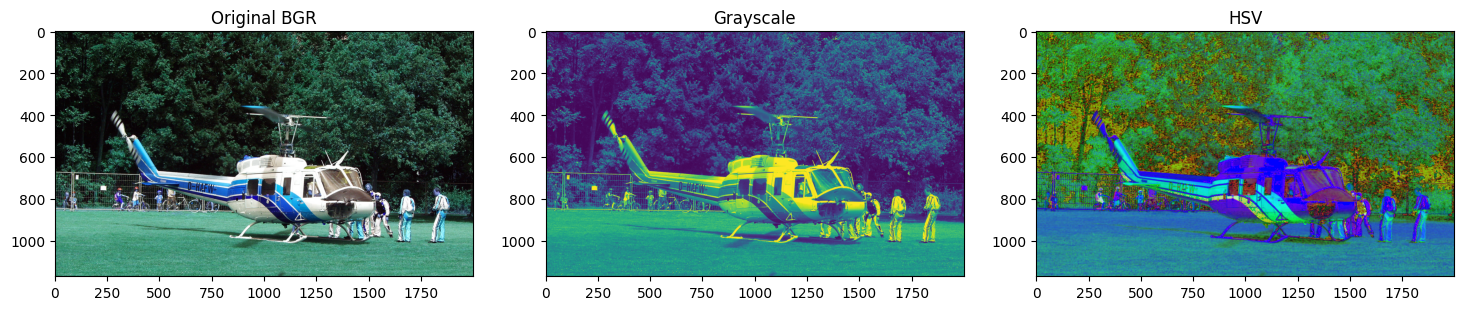

In [3]:
bgr_image = cv2.imread(os.path.join(assets_path, 'helicopter.jpg'))
gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)
hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)

fig, axes = plt.subplots(1,3, figsize=(15, 10))

axes[0].imshow(bgr_image)
axes[0].set_title("Original BGR")

axes[1].imshow(gray_image)
axes[1].set_title("Grayscale")

axes[2].imshow(hsv_image)
axes[2].set_title("HSV")

plt.tight_layout(pad=2.0)
plt.show()
# cv2.imshow('Original BGR', bgr_image)
# cv2.imshow('Grayscale', gray_image)
# cv2.imshow('HSV', hsv_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## 3. Image Smoothing (Blurring)

Image smoothing is used to reduce noise. OpenCV provides several filtering techniques.

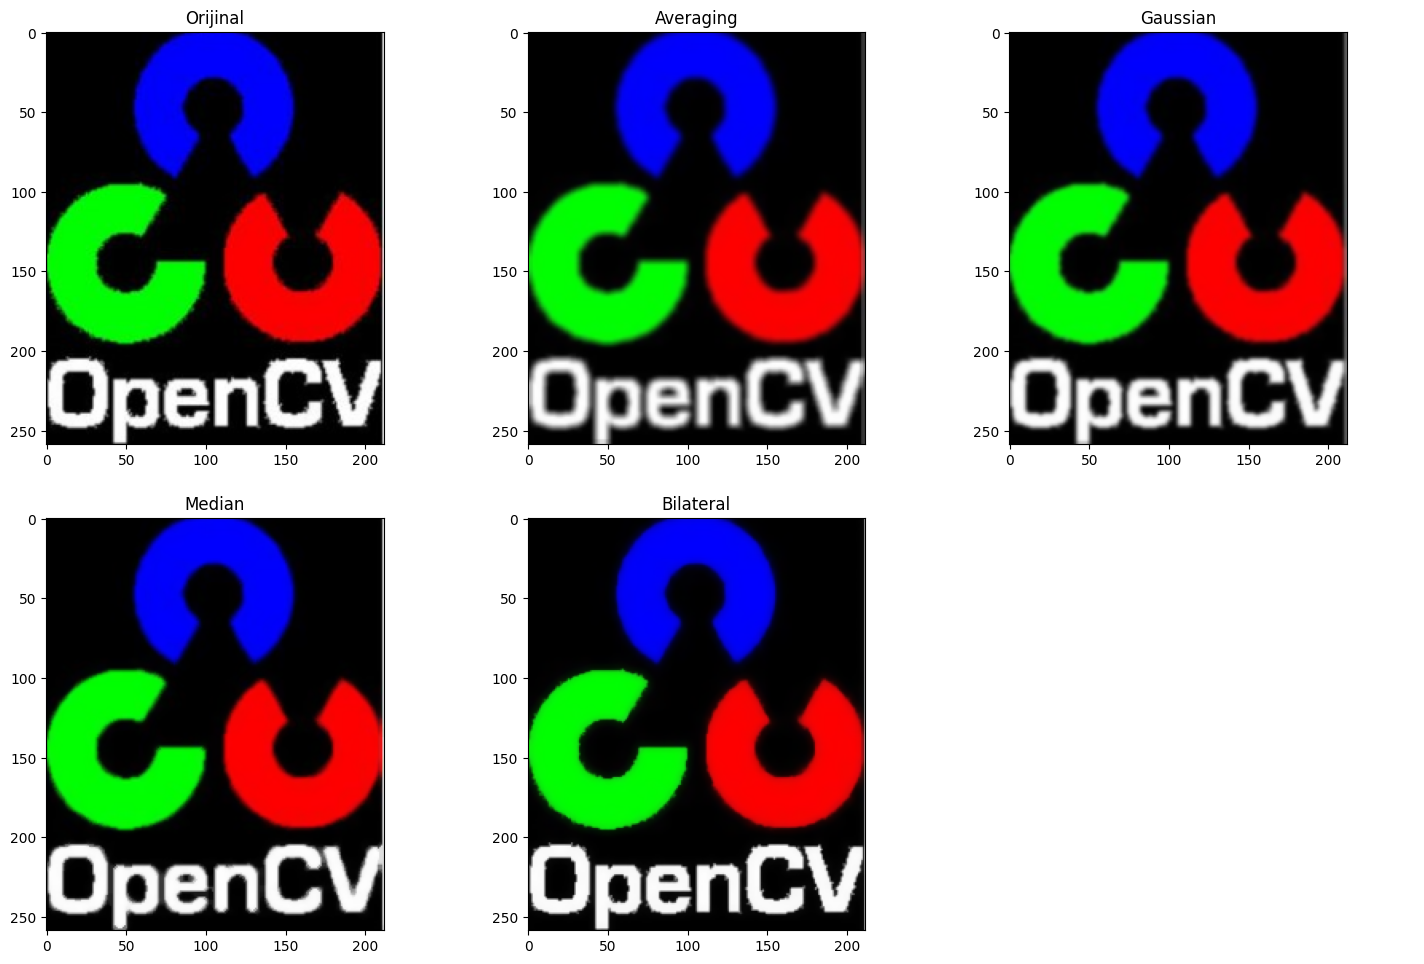

In [5]:
img = cv2.imread(os.path.join(assets_path, 'filter.png'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# farklı blur filtreleri
avg_blur       = cv2.blur(img_rgb, (5, 5))
gaussian_blur  = cv2.GaussianBlur(img_rgb, (5, 5), 0)
median_blur    = cv2.medianBlur(img_rgb, 5)
bilateral_blur = cv2.bilateralFilter(img_rgb, 9, 75, 75)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title("Orijinal")

axes[0, 1].imshow(avg_blur)
axes[0, 1].set_title("Averaging")

axes[0, 2].imshow(gaussian_blur)
axes[0, 2].set_title("Gaussian")

axes[1, 0].imshow(median_blur)
axes[1, 0].set_title("Median")

axes[1, 1].imshow(bilateral_blur)
axes[1, 1].set_title("Bilateral")

axes[1, 2].axis("off")  # boş hücre

plt.tight_layout(pad=2.0)
plt.show()

# cv2.imshow('Original', img)
# cv2.imshow('Averaging', avg_blur)
# cv2.imshow('Gaussian', gaussian_blur)
# cv2.imshow('Median', median_blur)
# cv2.imshow('Bilateral', bilateral_blur)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## 4. Bitwise Operations

Bitwise operations (`AND`, `OR`, `XOR`, `NOT`) are extremely useful for image masking and combining regions.

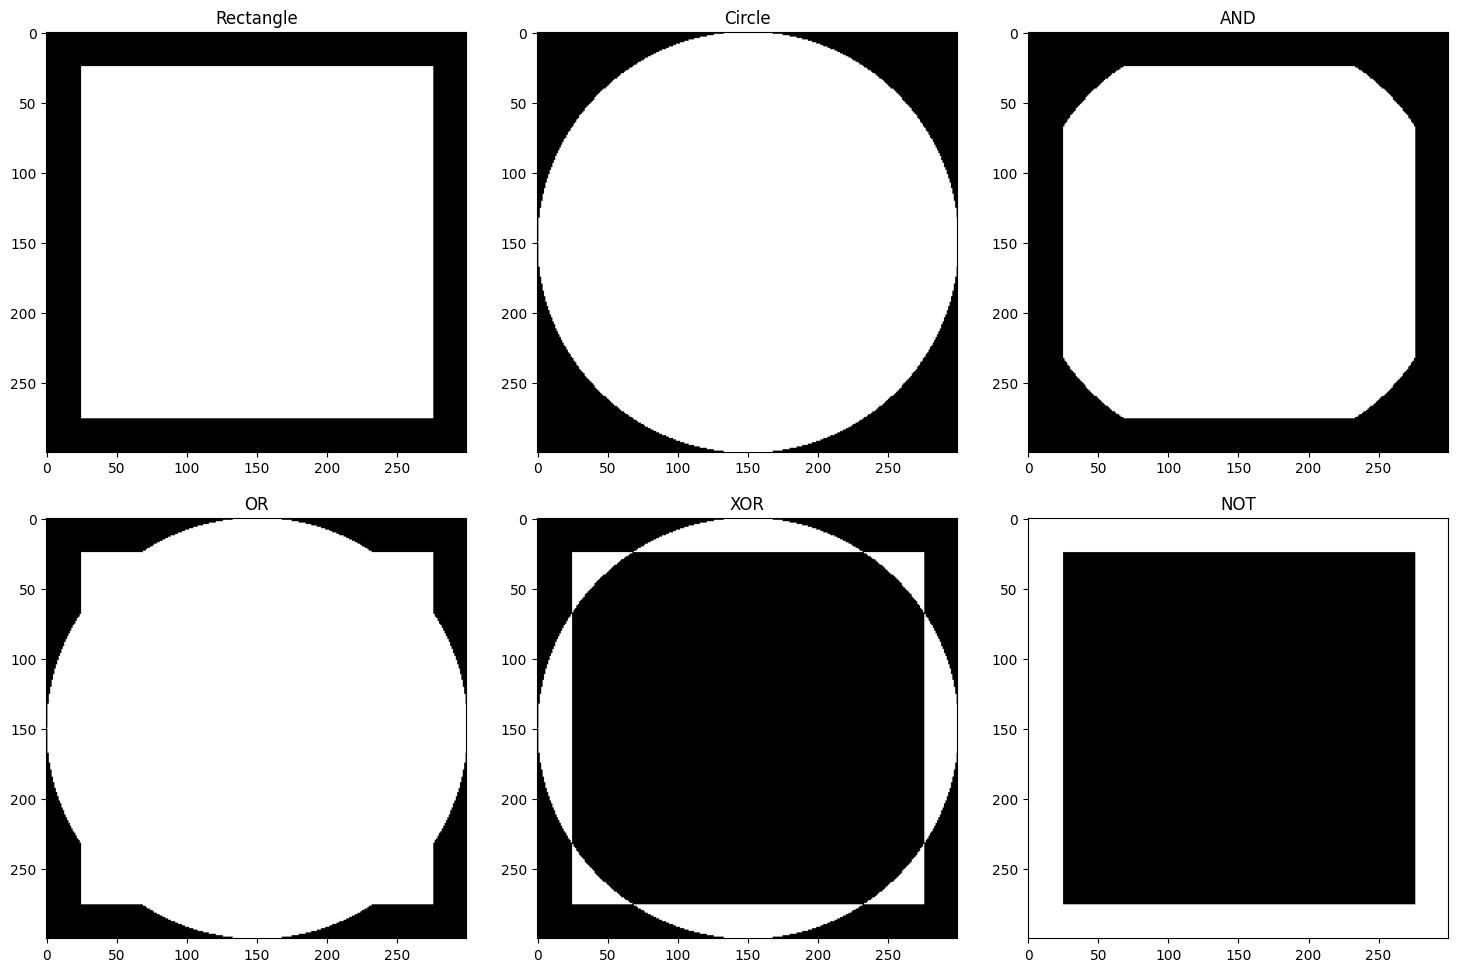

In [6]:
# şekilleri çizelim
rectangle = cv2.rectangle(np.zeros((300, 300), dtype="uint8"),
                          (25, 25), (275, 275), 255, -1)
circle = cv2.circle(np.zeros((300, 300), dtype="uint8"),
                    (150, 150), 150, 255, -1)

bitwise_and = cv2.bitwise_and(rectangle, circle)
bitwise_or  = cv2.bitwise_or(rectangle, circle)
bitwise_xor = cv2.bitwise_xor(rectangle, circle)
bitwise_not = cv2.bitwise_not(rectangle)

# 2 satır 3 sütunluk subplot düzeni
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(rectangle, cmap="gray")
axes[0, 0].set_title("Rectangle")

axes[0, 1].imshow(circle, cmap="gray")
axes[0, 1].set_title("Circle")

axes[0, 2].imshow(bitwise_and, cmap="gray")
axes[0, 2].set_title("AND")

axes[1, 0].imshow(bitwise_or, cmap="gray")
axes[1, 0].set_title("OR")

axes[1, 1].imshow(bitwise_xor, cmap="gray")
axes[1, 1].set_title("XOR")

axes[1, 2].imshow(bitwise_not, cmap="gray")
axes[1, 2].set_title("NOT")

plt.tight_layout(pad=2.0)
plt.show()

# cv2.imshow('Rectangle', rectangle)
# cv2.imshow('Circle', circle)
# cv2.imshow('AND', bitwise_and)
# cv2.imshow('OR', bitwise_or)
# cv2.imshow('XOR', bitwise_xor)
# cv2.imshow('NOT', bitwise_not)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Next Steps

This notebook covers common processing functions. More advanced topics like Geometric Transformations, Thresholding, and Morphological Operations are in other scripts in this directory. Feature Detection topics are in the `5_feature_detection` directory.